## Feature selection with categorical data
https://machinelearningmastery.com/feature-selection-with-categorical-data/#

### Prepare data for Ordinal Encoder

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
filename = "breast-cancer.csv"

In [3]:
# load the dataset as a pandas DataFrame
data = read_csv(filename, header=None)
# retrieve numpy array
dataset = data.values

In [4]:
# split into input (X) and output (y) variables
X = dataset[:, :-1]
y = dataset[:,-1]

In [5]:
# format all fields as string
X = X.astype(str)

In [6]:
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

In [7]:
# lead the dataset
X, y = load_dataset(filename)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [8]:
# summarise
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


In [9]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [10]:
# prepare target - could be done with OrdinalEncoder, but LabelEncoder is designed for a single variable
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [11]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train,y_test)

### Chi-Squared Feature Selection

In [12]:
# custom function for feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [13]:
# feature selection
X_train_fs, X_test_fs, fs=select_features(X_train_enc, y_train_enc, X_test_enc)

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


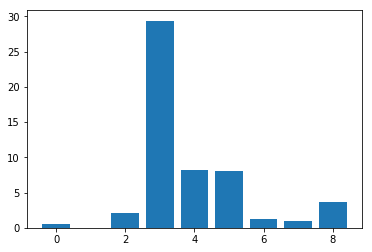

In [14]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

The bar chart indicates that features 3, 4, 5, and 8 are most relevant.
We could set k=4 When configuring the SelectKBest to select these top four features.

#### In a new branch of this Github, update the Ordinal Encoding example to try specifying the order for those variables that have a natural ordering and see if it has an impact on model performance.

### Build model with all features
Logistic regression is a good model for testing feature selection methods as it can perform better if irrelevant features are removed from the model.

In [15]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

LogisticRegression()

In [16]:
# evaluate the model
yhat = model.predict(X_test_enc)

In [17]:
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79
